In [3]:
# Importer les libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report


In [4]:
# Importer le dataset

dataset = pd.read_csv('DimPatientCoded.csv')
dataset

,Unnamed: 0,Date Announced,Age Bracket,Age,Gender,Detected State,PovertyRate,Current Status,Type of trans,Nationality,Symptoms,JobLoss,FinancialSituation,Diseases,Profession,CovidAfterVaccin,Vaccinated,Reason
0,0,1/30/2020,0,1.0,0,16,7.05,1,1,India,1,2,1,4,1,0,1,0.0
1,1,2/2/2020,0,1.0,1,16,7.05,1,1,India,5,0,0,4,2,1,1,0.0
2,2,2/3/2020,0,1.0,1,16,7.05,1,1,India,1,2,1,4,1,0,1,0.0
3,3,3/2/2020,0,1.0,1,8,9.91,1,1,India,2,2,0,2,1,0,0,2.0
4,4,3/2/2020,0,1.0,1,31,13.74,1,1,India,2,0,1,4,2,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247231,247231,8/6/2020,0,1.0,1,15,20.91,1,0,India,2,2,0,4,1,1,1,0.0
247232,247232,8/6/2020,0,1.0,1,15,20.91,1,0,India,5,2,0,2,1,0,0,5.0
247233,247233,8/6/2020,0,1.0,1,15,20.91,1,0,India,5,0,1,2,2,0,0,2.0
247234,247234,8/6/2020,0,1.0,1,15,20.91,1,0,India,5,0,1,2,2,0,1,0.0


In [5]:
#dimensions : nombre de lignes, nombre de colonnes
dataset.shape

(247236, 18)

In [10]:
#Visualiser les 5 premieres lignes
dataset.head()

,Date Announced,Age Bracket,Age,Gender,Detected State,PovertyRate,Current Status,Type of trans,Nationality,Symptoms,JobLoss,FinancialSituation,Diseases,Profession,CovidAfterVaccin,Vaccinated,Reason
0,1/30/2020,0,1.0,0,16,7.05,1,1,India,1,2,1,4,1,0,1,0.0
1,2/2/2020,0,1.0,1,16,7.05,1,1,India,5,0,0,4,2,1,1,0.0
2,2/3/2020,0,1.0,1,16,7.05,1,1,India,1,2,1,4,1,0,1,0.0
3,3/2/2020,0,1.0,1,8,9.91,1,1,India,2,2,0,2,1,0,0,2.0
4,3/2/2020,0,1.0,1,31,13.74,1,1,India,2,0,1,4,2,0,0,4.0


In [11]:
del dataset['Unnamed: 0']
#del dataset['Date Announced']
del dataset['Nationality']

KeyError: 'Unnamed: 0'

In [14]:
import numpy as np
x=dataset['Current Status']
dataset['Hospitalized'] =np.where(dataset['Current Status']==1,0,1)
dataset

,Date Announced,Age Bracket,Age,Gender,Detected State,PovertyRate,Current Status,Type of trans,Nationality,Symptoms,JobLoss,FinancialSituation,Diseases,Profession,CovidAfterVaccin,Vaccinated,Reason,Hospitalized
0,1/30/2020,0,1.0,0,16,7.05,1,1,India,1,2,1,4,1,0,1,0.0,0
1,2/2/2020,0,1.0,1,16,7.05,1,1,India,5,0,0,4,2,1,1,0.0,0
2,2/3/2020,0,1.0,1,16,7.05,1,1,India,1,2,1,4,1,0,1,0.0,0
3,3/2/2020,0,1.0,1,8,9.91,1,1,India,2,2,0,2,1,0,0,2.0,0
4,3/2/2020,0,1.0,1,31,13.74,1,1,India,2,0,1,4,2,0,0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247231,8/6/2020,0,1.0,1,15,20.91,1,0,India,2,2,0,4,1,1,1,0.0,0
247232,8/6/2020,0,1.0,1,15,20.91,1,0,India,5,2,0,2,1,0,0,5.0,0
247233,8/6/2020,0,1.0,1,15,20.91,1,0,India,5,0,1,2,2,0,0,2.0,0
247234,8/6/2020,0,1.0,1,15,20.91,1,0,India,5,0,1,2,2,0,1,0.0,0


In [15]:
#Modalités de la variable à expliquer
print(dataset['Hospitalized'].unique())


[0 1]


In [16]:
#Nombre d'observations par Modalité de la variable à expliquer
print(dataset.groupby('Hospitalized').size())


Hospitalized
0     68650
1    178586
dtype: int64


In [17]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

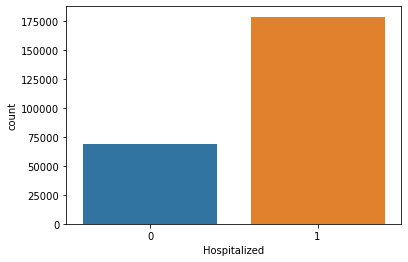

In [18]:
sn.countplot(dataset['Hospitalized'],label="Count")
plt.show()

In [37]:

XX =  dataset[['Age Bracket','Diseases','Hospitalized']]
dataset = XX.replace(np.nan,0)
dataset.head(247231)


,Age Bracket,Diseases,Hospitalized
0,0,4,0
1,0,4,0
2,0,4,0
3,0,2,0
4,0,4,0
...,...,...,...
247226,2,4,1
247227,2,2,1
247228,2,2,1
247229,0,4,0


In [28]:
# diviser les données en attributs et étiquettes (labes)

X = dataset.iloc[:, :-1].values

y= dataset.iloc[:,2].values

In [29]:
# Splitting du dataset Training set and Test set (80%,20%)


from sklearn.model_selection import train_test_split
X_train, X_test, y__train, y_test=train_test_split(X,y, test_size=0.40)


In [30]:
# Feature Scaling / Mise en echelle: Normalisation & Standardisation
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#Normalisation
#minmaxscaler=MinMaxScaler()
#X_train_n=minmaxscaler.fit_transform(X_train)
#X_test_n=minmaxscaler.fit_transform(X_test)

#Standardisation
standarscaler= StandardScaler()
X_train=standarscaler.fit_transform(X_train)
X_test=standarscaler.fit_transform(X_test)


In [31]:
#Instanciation du modèle
modele_regLog = LogisticRegression(penalty='none')
# Apprentissage 
modele_regLog.fit(X_train, y__train)
#Prédiction
y_pred=modele_regLog.predict(X_test)


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

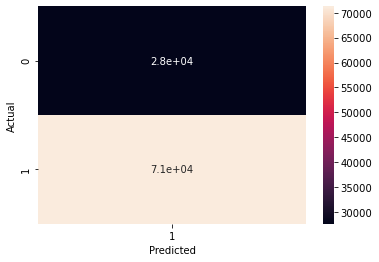

In [32]:
#Evaluation des performances
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     27622
           1       0.72      1.00      0.84     71273

    accuracy                           0.72     98895
   macro avg       0.36      0.50      0.42     98895
weighted avg       0.52      0.72      0.60     98895



C:\Users\eyanasri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eyanasri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eyanasri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
import sklearn.metrics as metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics .precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


Accuracy: 0.7206936649982304
Precision: 0.7206936649982304
Recall: 1.0


In [35]:
import pickle
with open('Prediction_Hospitalization_LR.pkl', 'wb') as file:
    pickle.dump(modele_regLog, file)